<div style="background: linear-gradient(to right, #FFB6B6, #FFD700); padding: 20px 50px; border-radius: 10px; text-align: center;">
    <img src="LOGO-png1.png" alt="Logo" style="max-width: 200px; margin: 0; display: block; margin-left: auto; margin-right: auto;">
    <h1 style="font-family: 'Brush Script MT', cursive; font-size: 64px; color: white; margin-top: 10px;">
        <span style="color: #007a5f;">Sham</span><span style="color: #fd8d08;">Soon</span>
    </h1>
</div>


<div style="background: linear-gradient(to right, #FFEDD5, #FFB84D); padding: 10px; border-radius: 10px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
    <h2 style="font-family: Arial, sans-serif; font-size: 28px; text-align: left; color: #007a5f; margin: 0;">
        Import Scripts:
    </h2>
</div>

In [1]:

# Import scripts
from data_loading import load_dataset
from model_building import build_model
from model_training import train_model
from utils import plot_training_history, evaluate_model, visualize_predictions , predict_image_class
from fine_tuning import fine_tune_model

In [2]:
# Configuration
IMG_HEIGHT = 244
IMG_WIDTH = 244
BATCH_SIZE = 32
IMAGE_SIZE = (224, 224)
DATA_DIR = "/kaggle/input/faulty-solar-panel-images/Faulty_solar_panel"

<div style="background: linear-gradient(to right, #FFEDD5, #FFB84D); padding: 10px; border-radius: 10px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
    <h2 style="font-family: Arial, sans-serif; font-size: 28px; text-align: left; color:#007a5f; margin: 0;">
        Load Data:
    </h2>
</div>


In [3]:

# Load the dataset
train_ds, val_ds = load_dataset(DATA_DIR, IMG_HEIGHT, IMG_WIDTH, BATCH_SIZE)

Found 4372 files belonging to 6 classes.
Using 3498 files for training.
Found 4372 files belonging to 6 classes.
Using 874 files for validation.


In [4]:
# Get class names
CLASS_NAMES = train_ds.class_names
print("Class names:", CLASS_NAMES)

Class names: ['Bird-drop', 'Clean', 'Dusty', 'Electrical-damage', 'Physical-Damage', 'Snow-Covered']


<div style="background: linear-gradient(to right, #FFEDD5, #FFB84D); padding: 10px; border-radius: 10px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
    <h2 style="font-family: Arial, sans-serif; font-size: 28px; text-align: left; color: #007a5f; margin: 0;">
        Modeling:
    </h2>
</div>

In [5]:

# Build the model
model = build_model(IMG_HEIGHT, IMG_WIDTH, len(CLASS_NAMES))
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 244, 244, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item (GetItem)        │ (None, 244, 244)       │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_1 (GetItem)      │ (None, 244, 244)       │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_2 (GetItem)      │ (None, 244, 244)       │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stack (Stack)             │ (None, 244, 244, 3)    │              0 │ get_item[0][0],        │
│                           │                        │                │ get_item_1[0][0],      │
│                           │                        │                │ get_item_2[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 244, 244, 3)    │              0 │ stack[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ vgg16 (Functional)        │ (None, 7, 7, 512)      │     14,714,688 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d  │ (None, 512)            │              0 │ vgg16[0][0]            │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 512)            │              0 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 6)              │          3,078 │ dropout[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 14,717,766 (56.14 MB)

 Trainable params: 3,078 (12.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

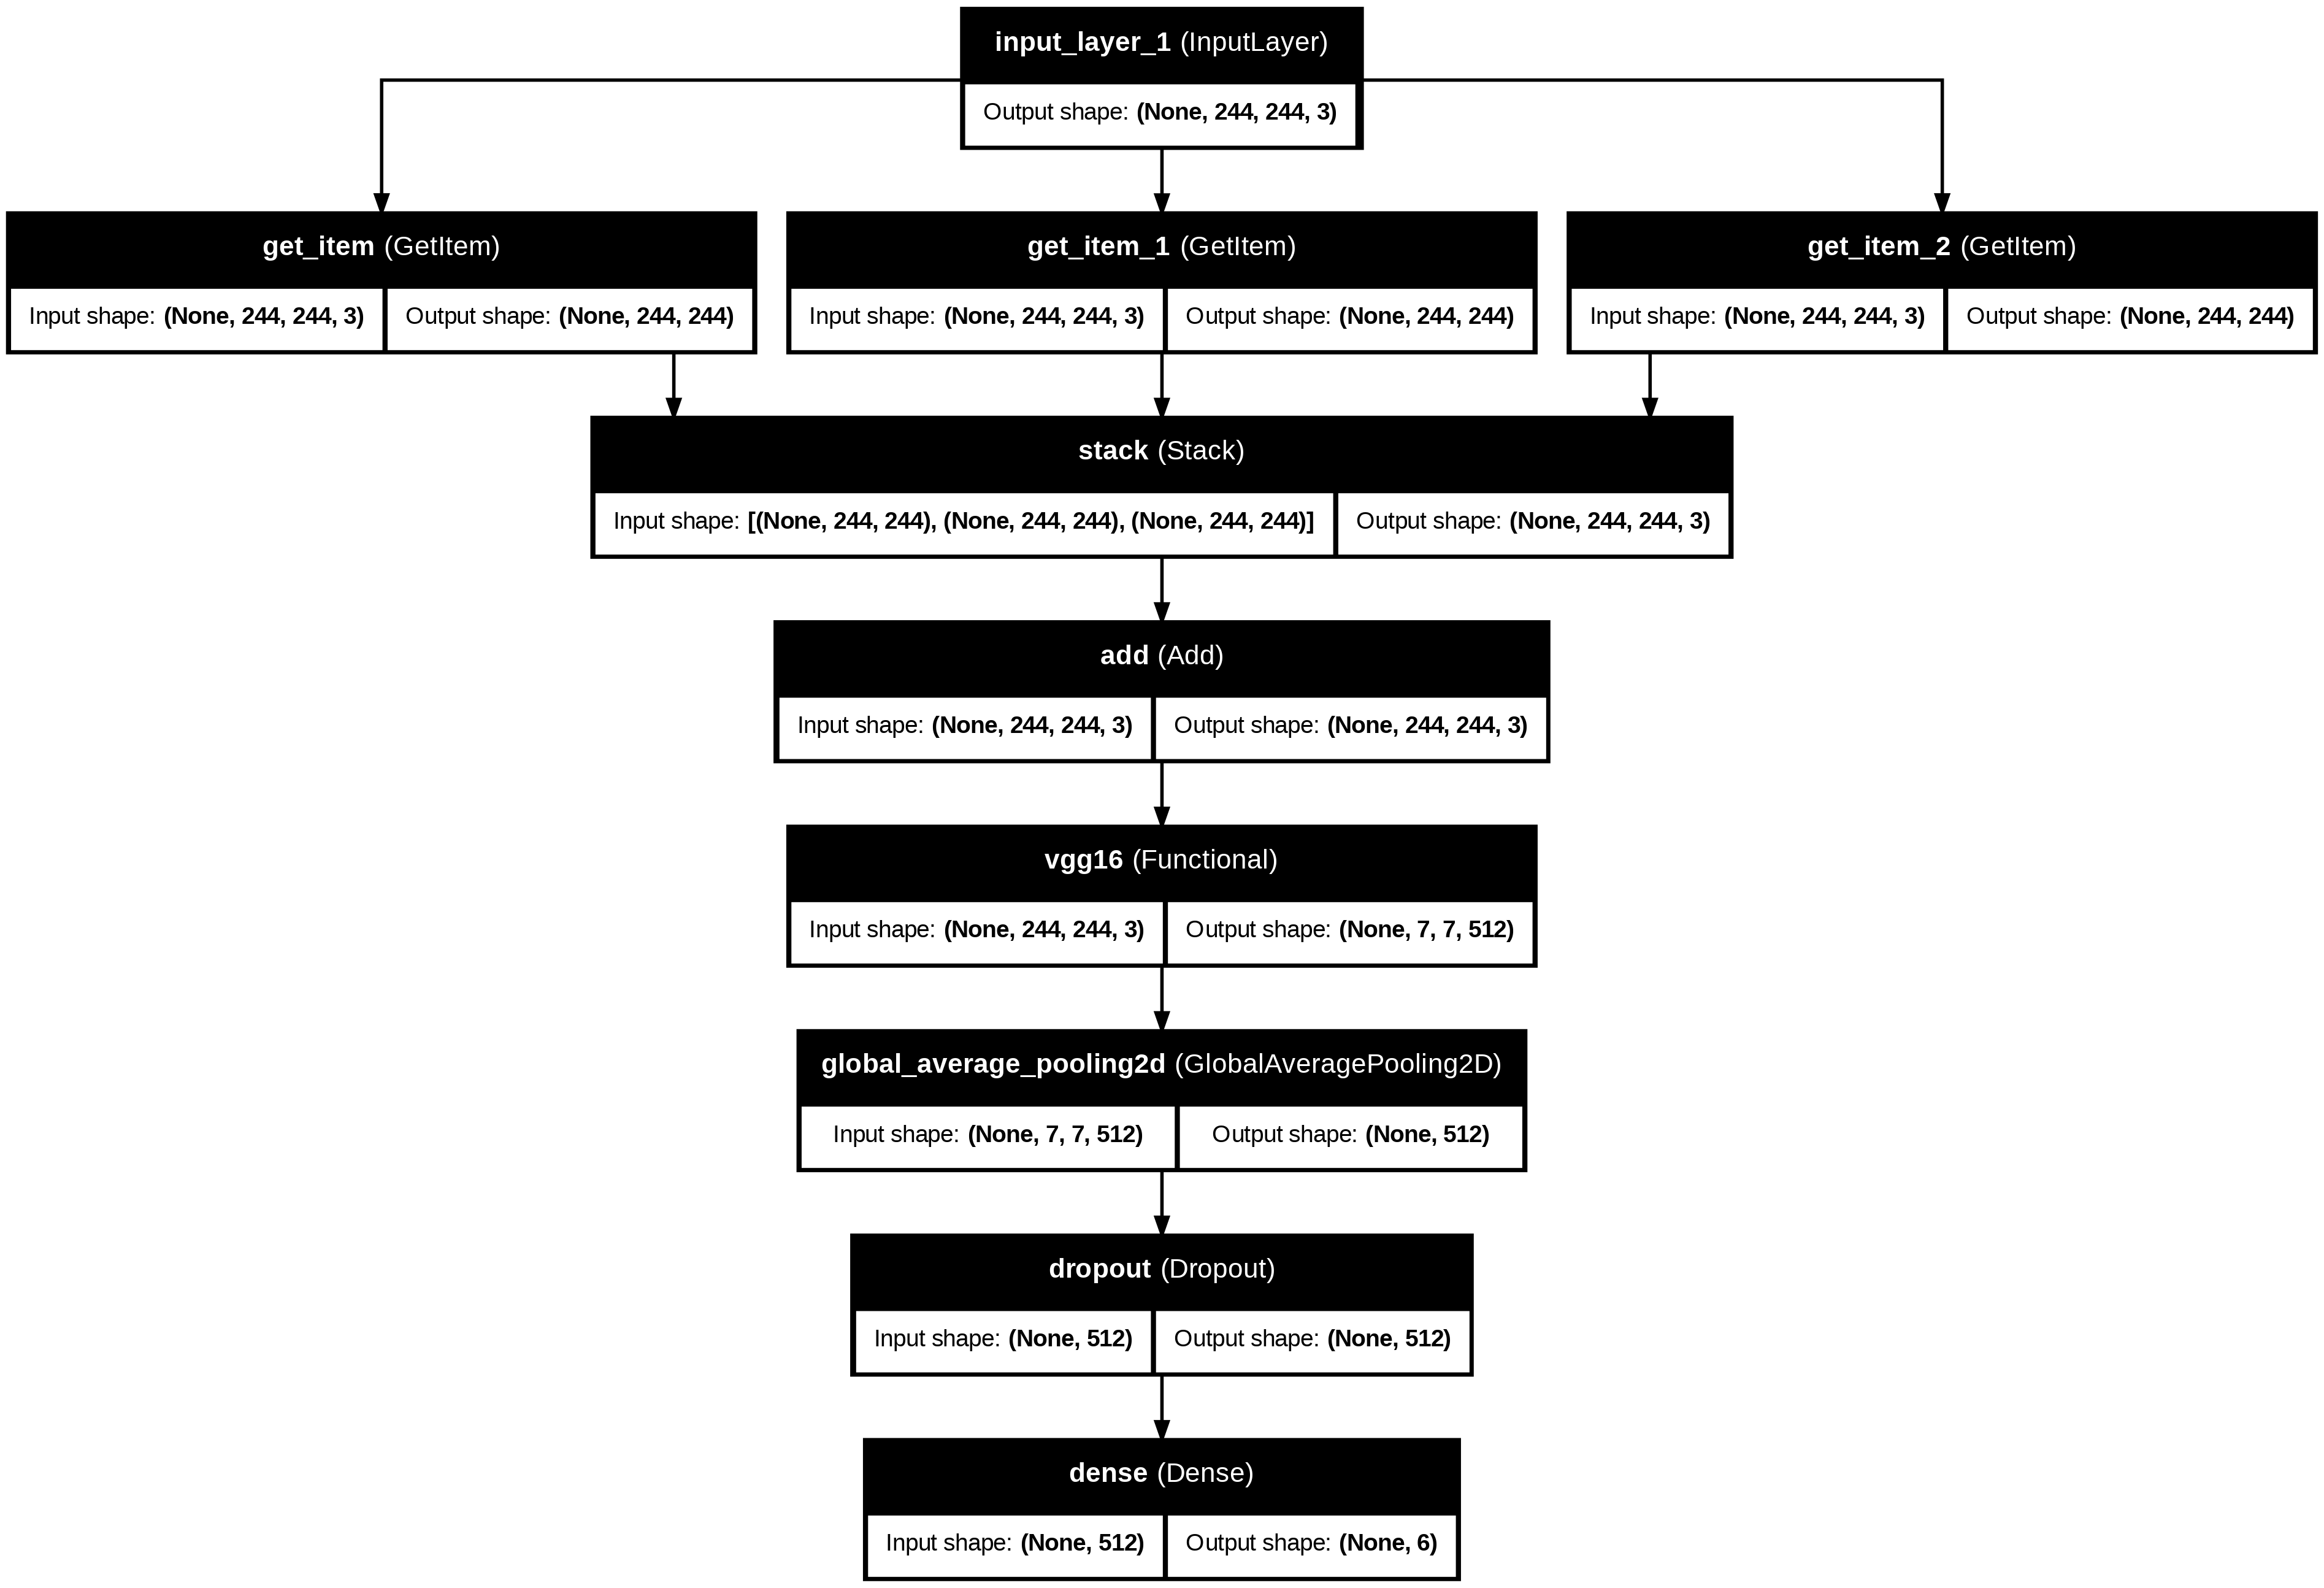

In [6]:
from tensorflow.keras.utils import plot_model

# Plot the model architecture and save it as an image
plot_model(model, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)

In [7]:
# Train the model
EPOCHS = 15
print("Training the model...")
history = train_model(model, train_ds, val_ds, EPOCHS)

Training the model...
Epoch 1/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 59s 346ms/step - accuracy: 0.2881 - loss: 4.7002 - val_accuracy: 0.6110 - val_loss: 1.3383
Epoch 2/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 25s 228ms/step - accuracy: 0.5434 - loss: 1.8286 - val_accuracy: 0.7151 - val_loss: 0.8646
Epoch 3/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 26s 237ms/step - accuracy: 0.6388 - loss: 1.2638 - val_accuracy: 0.7700 - val_loss: 0.6898
Epoch 4/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 26s 234ms/step - accuracy: 0.6815 - loss: 0.9700 - val_accuracy: 0.7815 - val_loss: 0.6653
Epoch 5/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 26s 232ms/step - accuracy: 0.7275 - loss: 0.8206 - val_accuracy: 0.8112 - val_loss: 0.5709
Epoch 6/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 26s 232ms/step - accuracy: 0.7479 - loss: 0.7170 - val_accuracy: 0.8192 - val_loss: 0.5471
Epoch 7/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 26s 235ms/step - accuracy: 0.7602 - loss: 0.6864 - val_accuracy: 0.8192 - val_loss: 0.5260
Epoch 8/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 26s 233ms/step - accu

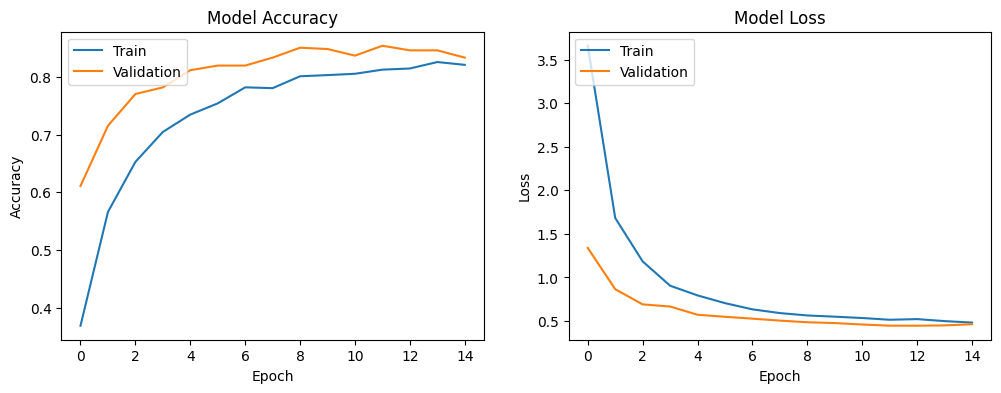

In [8]:
# Plot training history
plot_training_history(history)

In [9]:
# Save the model
model.save('/kaggle/working/solar_panel_fault_classification.h5')
print("Model saved.")

Model saved.


In [10]:
# Evaluate model
evaluate_model(model, val_ds)

28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 184ms/step - accuracy: 0.8593 - loss: 0.4421
Validation Loss: 0.4450796842575073
Validation Accuracy: 0.8535469174385071


(0.4450796842575073, 0.8535469174385071)

<div style="background: linear-gradient(to right, #FFEDD5, #FFB84D); padding: 10px; border-radius: 10px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
    <h2 style="font-family: Arial, sans-serif; font-size: 28px; text-align: left; color: #007a5f; margin: 0;">
        Fine Tuning:
    </h2>
</div>

In [11]:
FINE_TUNE_EPOCHS = 10
# Fine-tune the model
fine_tune_history = fine_tune_model(
    model=model,
    train_ds=train_ds,
    val_ds=val_ds,
    base_model_index=1,
    frozen_layers=14,
    learning_rate=0.0001,
    epochs=FINE_TUNE_EPOCHS
)

Epoch 1/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - accuracy: 0.7695 - loss: 0.6400
Epoch 1: val_loss improved from inf to 0.31246, saving model to best_model.keras
110/110 ━━━━━━━━━━━━━━━━━━━━ 41s 312ms/step - accuracy: 0.7698 - loss: 0.6390 - val_accuracy: 0.9211 - val_loss: 0.3125 - learning_rate: 1.0000e-04
Epoch 2/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - accuracy: 0.9145 - loss: 0.2468
Epoch 2: val_loss improved from 0.31246 to 0.28204, saving model to best_model.keras
110/110 ━━━━━━━━━━━━━━━━━━━━ 31s 277ms/step - accuracy: 0.9146 - loss: 0.2467 - val_accuracy: 0.9096 - val_loss: 0.2820 - learning_rate: 1.0000e-04
Epoch 3/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - accuracy: 0.9387 - loss: 0.1562
Epoch 3: val_loss improved from 0.28204 to 0.24155, saving model to best_model.keras
110/110 ━━━━━━━━━━━━━━━━━━━━ 30s 274ms/step - accuracy: 0.9388 - loss: 0.1560 - val_accuracy: 0.9325 - val_loss: 0.2416 - learning_rate: 1.0000e-04
Epoch 4/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0

<div style="background: linear-gradient(to right, #FFEDD5, #FFB84D); padding: 10px; border-radius: 10px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
    <h2 style="font-family: Arial, sans-serif; font-size: 28px; text-align: left; color: #007a5f; margin: 0;">
        Save Model:
    </h2>
</div>

In [12]:
model.save('/kaggle/working/solar_panel_fault_classification_finetuned.h5')
print("Fine-tuned model saved.")

Fine-tuned model saved.


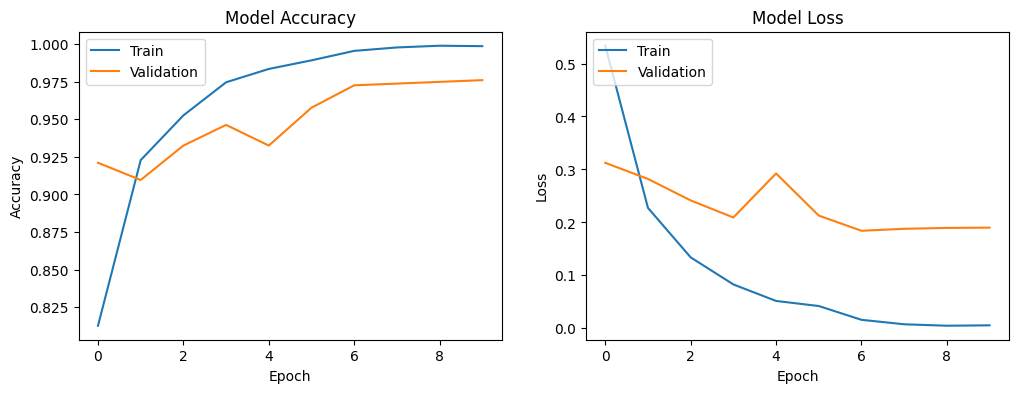

In [13]:
# Plot training history
plot_training_history(fine_tune_history)

<div style="background: linear-gradient(to right, #FFEDD5, #FFB84D); padding: 10px; border-radius: 10px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
    <h2 style="font-family: Arial, sans-serif; font-size: 28px; text-align: left; color: #007a5f; margin: 0;">
        Classification Results:
    </h2>
</div>

In [14]:
# Evaluate model
evaluate_model(model, val_ds)

28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 181ms/step - accuracy: 0.9705 - loss: 0.2423
Validation Loss: 0.18422448635101318
Validation Accuracy: 0.972540020942688


(0.18422448635101318, 0.972540020942688)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


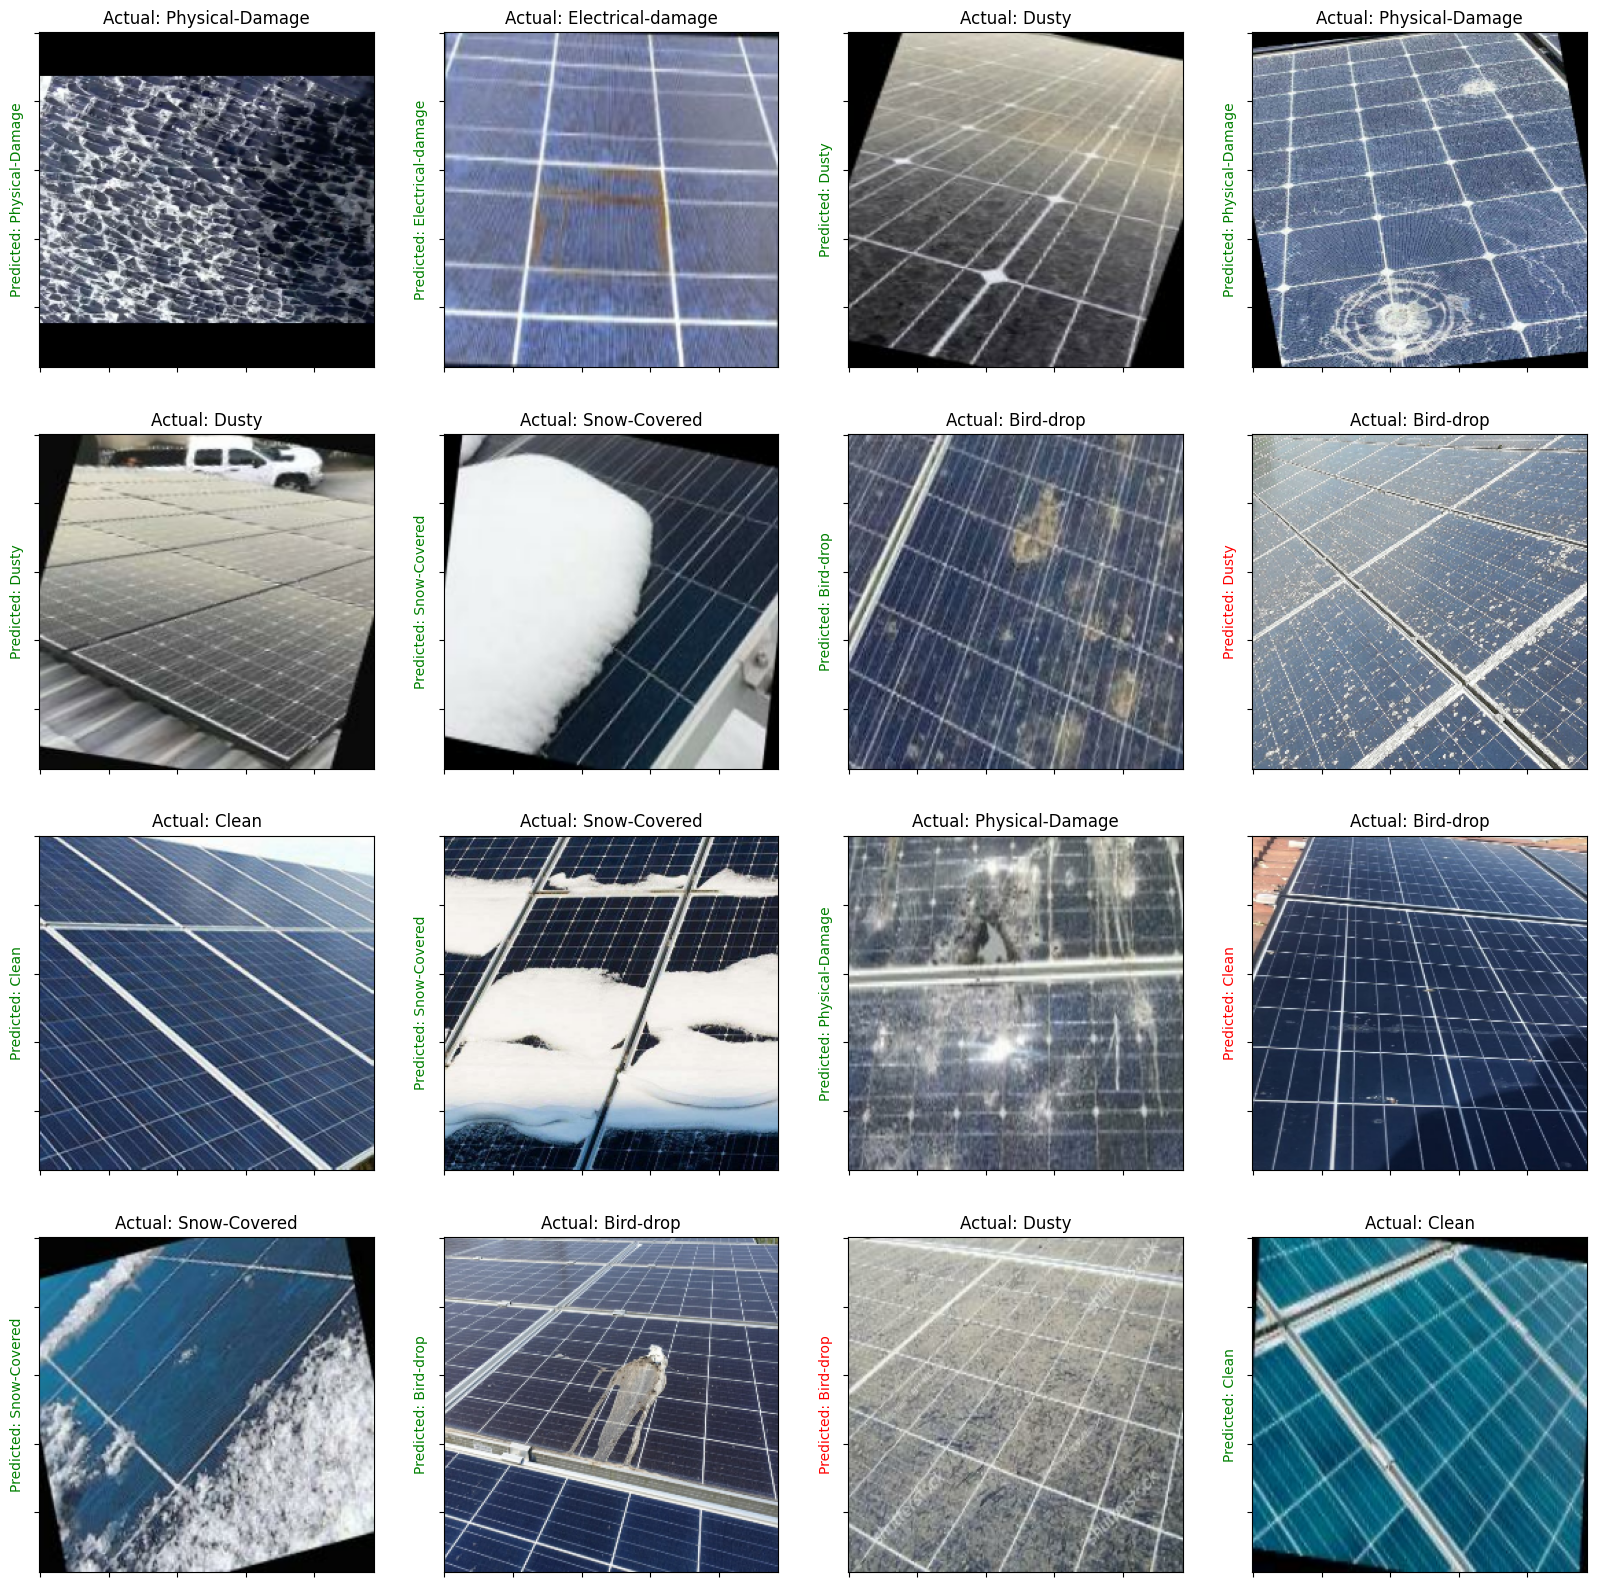

In [15]:
# Visualize predictions
visualize_predictions(model, val_ds, CLASS_NAMES)

<div style="background: linear-gradient(to right, #FFEDD5, #FFB84D); padding: 10px; border-radius: 10px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
    <h2 style="font-family: Arial, sans-serif; font-size: 28px; text-align: left; color: #007a5f; margin: 0;">
        Predict on New Data:
    </h2>
</div>

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


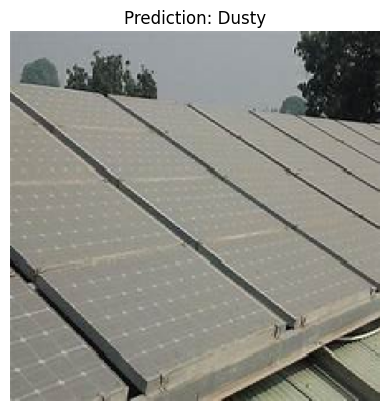

The image belongs to the class: Dusty
Predicted class index: 2
Predicted class label: Dusty


In [16]:
from tensorflow.keras.preprocessing import image
# Predict the class of a specific image
img_path = '/kaggle/input/faults/dust.jpg'  
predicted_class_index = predict_image_class(model, img_path, CLASS_NAMES)

# Print the predicted class
print(f"Predicted class index: {predicted_class_index}")
print(f"Predicted class label: {CLASS_NAMES[predicted_class_index]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


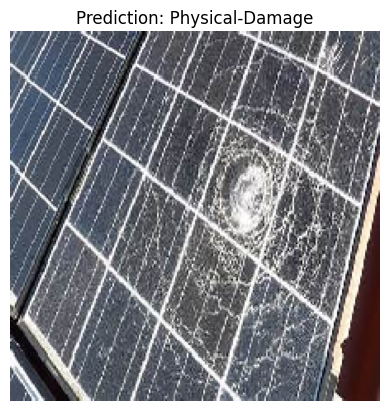

The image belongs to the class: Physical-Damage
Predicted class index: 4
Predicted class label: Physical-Damage


In [17]:
from tensorflow.keras.preprocessing import image

# Load and preprocess the image
img_path = '/kaggle/input/shamsoonnewdata/cracked.jpg' 
predicted_class_index = predict_image_class(model, img_path, CLASS_NAMES)

# Print the predicted class
print(f"Predicted class index: {predicted_class_index}")
print(f"Predicted class label: {CLASS_NAMES[predicted_class_index]}")

<div style="background: linear-gradient(to right, #FFEDD5, #FFB84D); padding: 10px; border-radius: 10px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
    <h2 style="font-family: Arial, sans-serif; font-size: 28px; text-align: left; color: #007a5f; margin: 0;">
        Save best model:
    </h2>
</div>

In [18]:
# Load the best model
from tensorflow.keras.models import load_model

best_model = load_model('best_model.keras')

In [19]:
# Evaluate the model
loss, accuracy = best_model.evaluate(val_ds)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 198ms/step - accuracy: 0.9733 - loss: 0.2089
Validation Loss: 0.18422451615333557
Validation Accuracy: 0.972540020942688
